In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fontes/candidatos.csv')


In [3]:
df.shape

(19158, 14)

In [4]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2

In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [8]:
df.describe().drop(columns=['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [9]:
df = df.rename(columns={
    'enrollee_id' : 'id', 
    'city' : 'cod_cidade', 
    'city_development_index' : 'indice_desenv_cidade', 
    'gender' : 'genero',
    'relevent_experience' : 'Experiencia_relevante', 
    'enrolled_university' : 'curso_universitario_matriculado', 
    'education_level' : 'nivel_educacional',
    'major_discipline' : 'disciplina_principal', 
    'experience' : 'experiencia', 
    'company_size' : 'tamanho_empresa', 
    'company_type' : 'tipo_empresa',
    'last_new_job' : 'ultimo_novo_emprego', 
    'training_hours' : 'horas_treinamento', 
    'target' : 'pretende_trocar_emprego'
})
df

,id,cod_cidade,indice_desenv_cidade,genero,Experiencia_relevante,curso_universitario_matriculado,nivel_educacional,disciplina_principal,experiencia,tamanho_empresa,tipo_empresa,ultimo_novo_emprego,horas_treinamento,pretende_trocar_emprego
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [10]:
df['Experiencia_relevante'].unique()


array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [11]:
df ['Experiencia_relevante'] = df['Experiencia_relevante'].map(
    {
        'Has relevent experience': 'Tem experiência relevante',
        'No relevent experience': 'Não tem experiência relevante',
    }
)
df

,id,cod_cidade,indice_desenv_cidade,genero,Experiencia_relevante,curso_universitario_matriculado,nivel_educacional,disciplina_principal,experiencia,tamanho_empresa,tipo_empresa,ultimo_novo_emprego,horas_treinamento,pretende_trocar_emprego
0,8949,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,Não tem experiência relevante,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,Não tem experiência relevante,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,Não tem experiência relevante,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Tem experiência relevante,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,Não tem experiência relevante,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Tem experiência relevante,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [12]:
df['experiencia'].value_counts()

experiencia
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [13]:
df['experiencia'] = np.where(df['experiencia'] == '>20', 21, df['experiencia'])
df['experiencia'] = np.where(df['experiencia'] == '<1', 1, df['experiencia'])
df['experiencia'] = df['experiencia'].astype(float)


In [14]:
df['experiencia'].value_counts()

experiencia
21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: count, dtype: int64

In [15]:
df['ultimo_novo_emprego'].value_counts()

ultimo_novo_emprego
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [16]:
df['ultimo_novo_emprego'] = np.where(df['ultimo_novo_emprego'] == '>4', 5, df['ultimo_novo_emprego'])
df['ultimo_novo_emprego'] = np.where(df['ultimo_novo_emprego'] == 'never', 0, df['ultimo_novo_emprego'])
df['ultimo_novo_emprego'] = df['ultimo_novo_emprego'].astype(float)

In [17]:
df['ultimo_novo_emprego'].value_counts()

ultimo_novo_emprego
1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: count, dtype: int64

<Axes: >

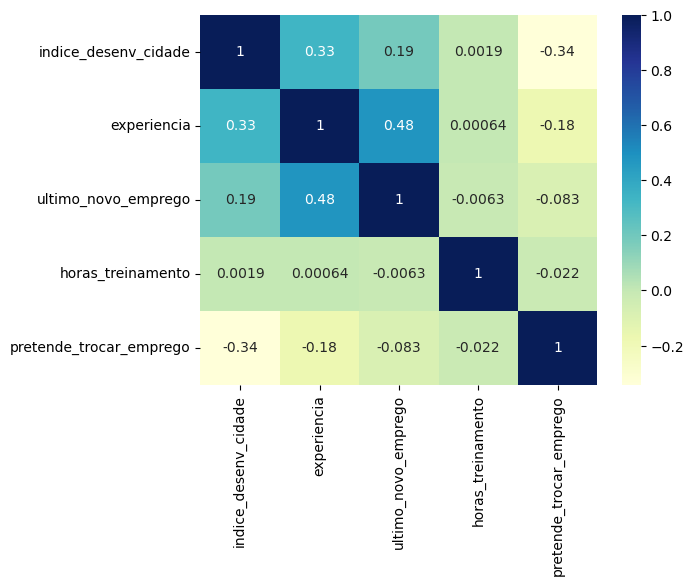

In [24]:
sns.heatmap(df.drop(['id', 'cod_cidade','Experiencia_relevante','curso_universitario_matriculado',
                     'nivel_educacional','disciplina_principal','tamanho_empresa','genero',
                     'tipo_empresa'],axis=1).corr(), annot=True, cmap='YlGnBu'
)